# Introduction to PyTorch

In [3]:
import torch
import torch.nn as nn

!pip install mitdeeplearning --quiet

import numpy as np
import matplotlib.pyplot as plt



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 22.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.5/152.5 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 694.9/694.9 kB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.8/69.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 107.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 89.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.4/278.4 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.5 MB/s eta 0:00:00


In [4]:
#Tensor is a n-dimensional arrays of base datatypes like strings and integers
#0-d tensots

integer = torch.tensor(1234)
decimal = torch.tensor(3.414)

print(f"'integer' is a {integer.ndim}-d tensor: {integer}")
print(f"'decimal' is a {decimal.ndim}-d tensor: {decimal}")


'integer' is a 0-d tensor: 1234
'decimal' is a 0-d tensor: 3.4140000343322754


In [5]:
#1-D tensors
#Vectors and lists can be used to create 1-D tensors

fibonacci = torch.tensor([1,2,3,4,5])
count_2_100 = torch.tensor(range(1,100))

print(f"fibonacci is a {fibonacci.ndim}-d tensor: {fibonacci}")
print(f"count_2_100 is a {count_2_100.ndim}-d tensor: {count_2_100}")


fibonacci is a 1-d tensor: tensor([1, 2, 3, 4, 5])
count_2_100 is a 1-d tensor: tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
        37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
        55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
        73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90,
        91, 92, 93, 94, 95, 96, 97, 98, 99])


In [6]:
#2-D Tensors

matrix = torch.tensor([[1,2,3], [4,5,6], [7,8,9]])
assert isinstance(matrix, torch.Tensor)
assert matrix.ndim == 2

print(f"'matrix' shape is {matrix.ndim}-d")

#4D Tensors

images = torch.zeros(10,3, 256, 256)
assert isinstance(images, torch.Tensor)
assert images.ndim == 4
assert images.shape == (10,3,256,256)

print(f"'Images' size is {images.ndim}-d with shape {images.shape}")


'matrix' shape is 2-d
'Images' size is 4-d with shape torch.Size([10, 3, 256, 256])


In [7]:
#Other examples

row_vector = matrix[1, :]
column_vector = matrix[:, 1]
scalar = matrix[0,1]

print(f"Row vetcor is: {row_vector}")
print(f"Column vector is: {column_vector}")
print(f"scalar is: {scalar}")


Row vetcor is: tensor([4, 5, 6])
Column vector is: tensor([2, 5, 8])
scalar is: 2


# Computations on Torches

In [8]:
#Addition on singular values (addition of 0d tensors)

a = torch.tensor(5)
b = torch.tensor(15)

c = torch.add(a,b)
d = a+b
print(f"c = {c} and d = {d}")

c = 20 and d = 20


In [9]:
def func(a,b):
  c = a+b
  d = 2*c
  e = d/2
  return e

a = torch.tensor(5)
b = torch.tensor(15)
example = func(a,b)

print(f"examples answer is {example}")

examples answer is 20.0


# Neural Networks in PyTorch

In [10]:
#In pytorch, all neural networks are sublcasses of nn.Module

class OurDenseLayer(torch.nn.Module):
  def __init__(self, num_inputs, num_outputs):
    super(OurDenseLayer, self).__init__()
    #Define Weights randomly
    self.W = torch.nn.Parameter(torch.randn(num_inputs,num_outputs))
    #define biases rendomly
    self.bias = torch.nn.Parameter(torch.randn(num_outputs))

  def forward(self, x):
    #z = x*weights + bias
    z = torch.matmul(x, self.W) + self.bias
    #y = sigmoid(z)
    y = torch.sigmoid(z)
    return y



In [11]:
num_inputs = 4
num_outputs = 3
#Initialize layer
layer = OurDenseLayer(num_inputs, num_outputs)
#Define input layer x
x_layer = torch.tensor([1,2,3,4], dtype=torch.float32)
y = layer(x_layer)

print(f"x_layer (input) shape is: {x_layer.shape} ")
print(f"y (output) shape is {y.shape}")
print(f"Outpit result is {y}")





x_layer (input) shape is: torch.Size([4]) 
y (output) shape is torch.Size([3])
Outpit result is tensor([4.8948e-04, 9.5883e-01, 2.4581e-04], grad_fn=<SigmoidBackward0>)


Defining NN using Sequential API

In [12]:
n_input_nodes = 2
n_output_nodes = 3

model = nn.Sequential(nn.Linear(n_input_nodes, n_output_nodes), #Dense layer
                      nn.Sigmoid()) #Activation Function
x_input = torch.tensor([4,5.])
model_out = model(x_input)
print(f"input shape: {x_input.shape}")
print(f"Output shape: {model_out.shape}")
print(f"Output : {model_out}")



input shape: torch.Size([2])
Output shape: torch.Size([3])
Output : tensor([0.0232, 0.3768, 0.2815], grad_fn=<SigmoidBackward0>)


Linear with Sigmoid Activation (NN using Subclassing)

In [15]:
class LinearWithSigmoidActivation(nn.Module):
  def __init__(self, num_inputs, num_outputs):
    super(LinearWithSigmoidActivation, self).__init__()
    self.linear = nn.Linear(num_inputs, num_outputs)
    self.activation = nn.Sigmoid()

  def forward(self, x):
    linear_out = self.linear(x)
    out = self.activation(linear_out)
    return out

n_input_nodes = 2
n_output_nodes = 3
x_input  = torch.tensor([4,5.])
model = LinearWithSigmoidActivation(n_input_nodes, n_output_nodes)
model_out  = model(x_input)
print(f"input shape: {x_input.shape}")
print(f"Output shape: {model_out.shape}")
print(f"Output : {model_out}")



input shape: torch.Size([2])
Output shape: torch.Size([3])
Output : tensor([0.5241, 0.9943, 0.6841], grad_fn=<SigmoidBackward0>)


Custom Behavior with Subclassing nn.Module

In [20]:
class LinearButSometimesIdentity(nn.Module):
  def __init__(self, num_inputs, num_outputs):
    super(LinearButSometimesIdentity, self).__init__()
    self.linear = nn.Linear(num_inputs, num_outputs)

  def forward(self, x, isidentity=False):
    if isidentity:
      return x
    else:
      return self.linear(x)

model = LinearButSometimesIdentity(num_inputs=2, num_outputs=3)
x_input = torch.tensor([4,5.])
model_out_linear = model(x_input)
model_out_identity = model(x_input, isidentity=True)
print(f"input shape: {x_input.shape}")
print(f"Output shape: {model_out_linear.shape}")
print(f"Output linear : {model_out_linear}")
print(f"Output shape: {model_out_identity.shape}")
print(f"Output Identity : {model_out_identity}")



input shape: torch.Size([2])
Output shape: torch.Size([3])
Output linear : tensor([-3.1093, -2.8217, -0.9816], grad_fn=<ViewBackward0>)
Output shape: torch.Size([2])
Output Identity : tensor([4., 5.])


# Automatic Differentiation in Pytorch

In [23]:
#derivative of y=x^2

x = torch.tensor(3.0, requires_grad=True)
y = x**2
y.backward()
dy_dx = x.grad
print(f"dy/dx of x^2  at x = 3 is {dy_dx}")
assert dy_dx == 6

dy/dx of x^2  at x = 3 is 6.0


# Finding Minimum of an item

x is 0.18479585647583008


/tmp/ipython-input-813058442.py:20: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend('Predicted', 'True')


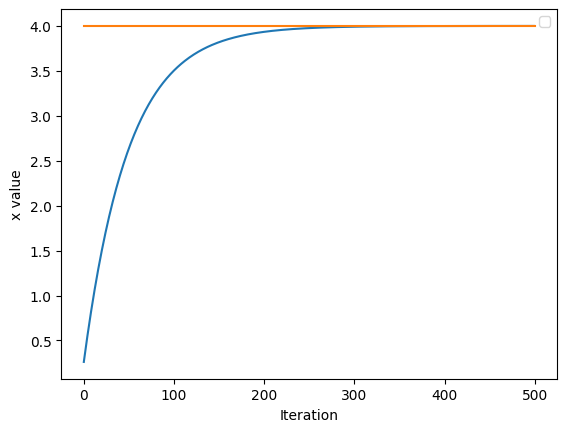

In [25]:
#Function L = (x-xf)^2

x = torch.randn(1) #initialize random x
print(f"x is {x.item()}")

learning_rate = 1e-2
history = []
x_f = 4

for i in range(500):
  x = torch.tensor([x], requires_grad=True)
  loss = (x-x_f)**2
  loss.backward()
  x = x.item() - learning_rate*x.grad #gradient descent formula => x_new = x_old - learning_rate*(dloss/dx)
  history.append(x.item())


plt.plot(history)
plt.plot([0,500], [x_f, x_f])
plt.legend('Predicted', 'True')
plt.xlabel('Iteration')
plt.ylabel('x value')
plt.show()


